In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime

In [8]:
# load the comments csv to a dataframe, sampling 10%
percentage = 0.10
df = pd.read_csv(
    '../data/out/comments.csv', 
    header=None, 
    skiprows=lambda x: x>0 and random.random()>percentage
)
df

,0,1,2,3
0,cxiigat,AskReddit,1448928000,2
1,cxiigax,KotakuInAction,1448928000,0
2,cxiigbr,socialwork,1448928001,1
3,cxiigbs,fnafcringe,1448928001,1
4,cxiigcl,AskReddit,1448928002,1
...,...,...,...,...
5471500,cyhtloy,Android,1451606397,4
5471501,cyhtlp3,comicbooks,1451606397,1
5471502,cyhtlp7,Mavericks,1451606397,1
5471503,cyhtlpf,CoDCompetitive,1451606398,1


In [9]:
# change column names
df.columns = ['comment_id', 
              'subreddit', 
              'timestamp', 
              'karma']

In [16]:
# Comment volume over the days

def convert_to_dt(timestamp):
    dt = datetime.fromtimestamp(timestamp)
    return dt

try:
    df['timestamp'] = df['timestamp'].apply(convert_to_dt)
except:
    pass

# these should be scaled up with a larger dataset:
# instead of going day by day or hour by hour we can see aggregates by month/year
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df['day'] = pd.DatetimeIndex(df['timestamp']).day
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour
df['weekday'] = pd.DatetimeIndex(df['timestamp']).weekday
df.head()

,comment_id,subreddit,timestamp,karma,year,month,day,hour,weekday
0,cxiigat,AskReddit,2015-11-30 16:00:00,2,2015,11,30,16,0
1,cxiigax,KotakuInAction,2015-11-30 16:00:00,0,2015,11,30,16,0
2,cxiigbr,socialwork,2015-11-30 16:00:01,1,2015,11,30,16,0
3,cxiigbs,fnafcringe,2015-11-30 16:00:01,1,2015,11,30,16,0
4,cxiigcl,AskReddit,2015-11-30 16:00:02,1,2015,11,30,16,0


In [11]:
from IPython.display import display
pd.options.display.max_rows = None

grouped = df.groupby(['month', 'day']).count()
december = grouped[1:]['comment_id']
december

month  day
12     1      193722
       2      196798
       3      195381
       4      179098
       5      161187
       6      174500
       7      194346
       8      198317
       9      197681
       10     193035
       11     179910
       12     158646
       13     177461
       14     165230
       15     197468
       16     188896
       17     182208
       18     172240
       19     153613
       20     165764
       21     182523
       22     183379
       23     172300
       24     148924
       25     131834
       26     143168
       27     162452
       28     180453
       29     184878
       30     182284
       31     110162
Name: comment_id, dtype: int64

In [14]:
december.values

array([193722, 196798, 195381, 179098, 161187, 174500, 194346, 198317,
       197681, 193035, 179910, 158646, 177461, 165230, 197468, 188896,
       182208, 172240, 153613, 165764, 182523, 183379, 172300, 148924,
       131834, 143168, 162452, 180453, 184878, 182284, 110162],
      dtype=int64)

<BarContainer object of 31 artists>

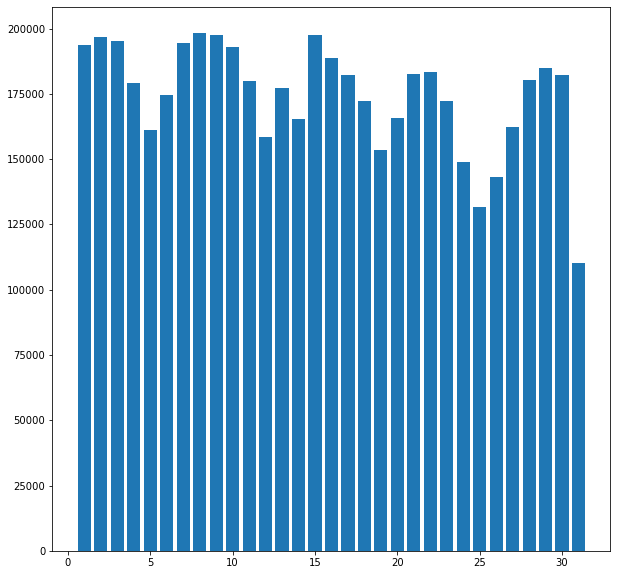

In [15]:
# plotting volume against days in december
fig, axes = plt.subplots(figsize=(10, 10))
plt.bar(range(1, 32), december.values)

In [ ]:
# future: change to day of week